In [30]:
from graphviz import Digraph

'''기존 bstNode 코드를 수정했습니다.'''

class BSTNode:
    def __init__(self, value, parent):
        self.value = value
        self.parent = parent                                    #insert, height 계산을 위해서 parent 변수를 추가
        self.left = None
        self.right = None

    def __repr__(self):
        return f"{self.value}"

    '''기존의 insert함수를 수정했습니다. 교수님께서 주신 avl,bst 코드가 조금 더 직관적인것 같아서 그 스타일로 수정했습니다.'''
    def insert(self, node):
        if node is None:                        #삽입하고 하는 노드가 None이라면 종료
            return
        else:                                   #아니라면 진행
            if node.value < self.value:         #넣고자 하는 값이 self보다 작다면 왼쪽으로.
                if self.left is None:           #left가 없다면 left를 자신으로 지정.
                    self.left = node            
                    node.parent = self          #link 연결
                else:                           #left가 있다면, left에 대해서 재귀
                    self.left.insert(node)
            else:                               #넣고자 하는 값이 self보다 크거나 같다면 오른쪽으로. 이하 동문
                if self.right is None:
                    self.right = node
                    self.right.parent = self
                else:
                    self.right.insert(node)

'''어떻게 height라는 값이 node에 init 되어 있지 않은데 node.height를 쓸 수 있는거지라는 의문이 있었는데, 동적할당이라는게 신기했습니다.'''
def update_height(node):
    while node is not None:
        node.height = max(height(node.left) , height(node.right)) + 1
        node = node.parent
        
def height(node):                       #객체에 동적으로 할당하는..
    if node is None:                    #노드가 none이면 -1 반환
        return -1
    else:                               #아니라면 node.height 반환
        return node.height

'''BST 또한 수정했습니다.'''
class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, value):
        node = BSTNode(value, None)             #insert 함수. 동적으로 BSTNode 생성

        if self.root is None:                          #root가 비어있으면? (가장 첫번째 insert면?)
            self.root = node                           #자신이 root가 됨.
        else:                                          #root가 비어있지 않다면?
            self.root.insert(node)                     #root에 대해서 insert 수행

        #insert가 끝나면, 해당 노드에 대한 height 지정 =>dynamic. 첫번째 노드 : left, right 둘다 None 따라서 max 의해서 0, + 1로 height 1로 지정
        update_height(node)
        return node                                    #return node하는 이유는 => rotate에서 필요. rotate 없으면 return 필요 x

    def visualize(self, filename='tree'):
        dot = Digraph(comment='Binary Search Tree')
        self._add_nodes(dot, self.root)
        dot.render(filename, format='png', cleanup=True)

    def _add_nodes(self, dot, root):
        if root:
            dot.node(str(root.value))
            if root.left:
                dot.edge(str(root.value), str(root.left.value), label='L')
                self._add_nodes(dot, root.left)
            if root.right:
                dot.edge(str(root.value), str(root.right.value), label='R')
                self._add_nodes(dot, root.right)


tree = BinarySearchTree()
tree.insert(5)
tree.insert(3)
tree.insert(7)
tree.insert(1)
tree.insert(4)
tree.insert(6)

6

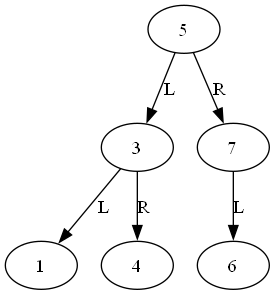

In [31]:
from IPython.display import Image, display
 
display(Image(filename='bst1.png'))

# 1. 위 tree는 balanced tree 인가? (AVL tree 관점에서 확인하시오) check balanced 등의 코드를 정의하여 코드로 확인하시오. (10점)

In [32]:
def check_balance(node):
    if node is None:            #노드가 비어있으면 바로 반환
        return "True it's balanced" 

    left_right_height_diff = abs(height(node.left) - height(node.right))            #left와 right height의 차이를 절댓값으로 계산

    if left_right_height_diff >= 2:     #해당 절댓값이 2이상이라면 unbalance..
        return "False it's not balanced"

    return check_balance(node.left) and check_balance(node.right)       #이후 해당 노드 밑으로 재귀. left와 right 존재 여부는 and로 처리

check_balance(tree.root)

"True it's balanced"

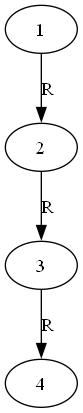

In [33]:
tree = BinarySearchTree()
tree.insert(1)
tree.insert(2)
tree.insert(3)
tree.insert(4)
 
tree.visualize('bst2')
display(Image(filename='bst2.png'))

# 2. 위 tree는 balanced 인가? 1번과 같은 방법으로 확인하시오 (10점)

In [34]:
print(check_balance(tree.root))

False it's not balanced


# 3. 위 BST를 상속하여 AVL tree class를 만들고, insert를 1,2,3,4,... 15 순서대로 입력하고 rotation 이 총 몇번 수행되는지 출력하시오. 또한 최종 결과를 위와 같이 시각화 하시오 (30점)  

1노드 대상 left rotate 발생
3노드 대상 left rotate 발생
2노드 대상 left rotate 발생
5노드 대상 left rotate 발생
7노드 대상 left rotate 발생
6노드 대상 left rotate 발생
9노드 대상 left rotate 발생
4노드 대상 left rotate 발생
11노드 대상 left rotate 발생
10노드 대상 left rotate 발생
13노드 대상 left rotate 발생


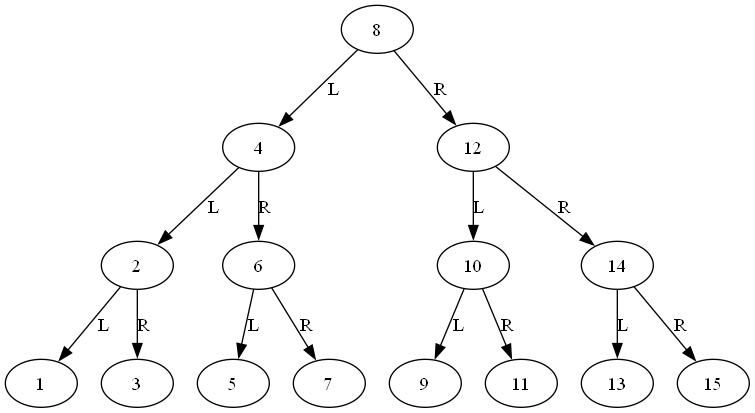

11번 rotate 발생


In [35]:
class AVL(BinarySearchTree):
    def __init__(self):
        super().__init__()
        self.rot_count = 0

    def left_rotate(self, node):                #left rotate
        x = node                                # x로 node 받기
        y = x.right                             # x.right를 y로 저장
        y.parent = x.parent                     # 일단 아무 조건 생각 없이 y와 x의 parent를 연결.
        if y.parent is None:                    # 만약 y.parent가 None이라면 y는 root가 됨.
            self.root = y
        else:                                   # 아니라면
            if y.parent.left is x:              # x가 x.parent의 left였는지 right였는지 따지는것이 중요함. 만약 left였다면 left로 y를 연결.
                y.parent.left = y               # 이로써 y와 y.parent와의 linking 완료
            elif y.parent.right is x:           #right인 경우
                y.parent.right = y
        x.right = y.left                        # x의 right에는 y의 left가 붙음. 왜냐면 y는 애초에 x의 right였으니.. y의 left는 전부 x보다 큼
        if x.right is not None:                 #만약 x right가 None 이 아니라면 y.left가 잘 붙었다는 이야기이니. 그 parent를 x로 지정
            x.right.parent = x
        y.left = x                              # 이제 x와 y의 관계 정리.
        x.parent = y
        update_height(x)                        # rotate이후 height 업데이트
        update_height(y)
        print(f"{node}노드 대상 left rotate 발생")                 # rotate 발생 사실 알리기용
        self.rot_count += 1                     #  rot_count 세기 위한..

    def right_rotate(self, node):               #right Rotate는 left rotate와 동일 left랑 right만 변경
        x = node
        y = x.left
        y.parent = x.parent
        if y.parent is None:
            self.root = y
        else:
            if y.parent.left is x:
                y.parent.left = y
            elif y.parent.right is x:
                y.parent.right = y
        x.left = y.right
        if x.left is not None:
            x.left.parent = x
        y.right = x
        x.parent = y
        update_height(x)
        update_height(y)
        print(f"{node}노드 대상 right rotate 발생")
        self.rot_count += 1
        
    # x가 처음으로 규칙을 위반했을때 => insert 할때마다 rebalance해주는거라 rotate는 최대 2번임.
    def rebalanced(self, node):   
        rot_count = 0
        while node is not None:
            if height(node.left) >= 2 + height(node.right):             # height_diff 쓰지 않는 이유 : unbalance가 left인지 right인지 check해야 하기 때문
                if height(node.left.left) >= height(node.left.right):  # 이건 왼쪽으로 치우쳐진 경우중 일직선일때는 right rotate 한번만 해도 되는것임.
                    self.right_rotate(node)
                else:  # 왼쪽 치우쳐진 경우중 zigzag일때 left rotate후 right rotate.
                    self.left_rotate(node.left)
                    self.right_rotate(node)
            elif height(node.right) >= 2 + height(node.left):  #반대. 오른쪽으로 치우쳐진 경우임.
                if height(node.right.right) >= height(node.right.left):
                    self.left_rotate(node)
                else:
                    self.right_rotate(node.right)
                    self.left_rotate(node)

            update_height(node)                                 #rebalance이후 update
            node = node.parent                                  #leaf에서 root까지 rebalance. insert할때 항상 시행하기에 leaf 노드 부터 시작할것임.

    def insert(self, k):                                        #insert 함수
        node = super(AVL, self).insert(k)
        self.rebalanced(node)

tree = AVL()
for i in range (1, 16):
    tree.insert(i)

tree.visualize('avl')
display(Image(filename='avl.png'))
print(f"{tree.rot_count}번 rotate 발생")

# 4. 위 문제를 insert 를 어떤 순서대로 넣었다면 rotation 이 한번도 발생하지 않을까? 임의의 insert 순서를 찾아서 보이시오 (20점)

In [27]:
tree = AVL()
no_rotate_insertion_order = [8, 4, 12, 2, 6, 10, 14, 1, 3, 5, 7, 9, 11, 13, 15]
for i in no_rotate_insertion_order:
    tree.insert(i)
print(f"{no_rotate_insertion_order} 순서 insert 시 {tree.rot_count}번 rotate 발생")

[8, 4, 12, 2, 6, 10, 14, 1, 3, 5, 7, 9, 11, 13, 15] 순서 insert 시 0번 rotate 발생


# 5. 위 4번 문제에서 영감을 얻어 정렬된 list가 있을 때, AVL tree가 아닌 BinarySearchTree 에서 balance된 tree를 만드는 함수를 만드시오 insert 순서를 조작하는 함수를 만들거나, left, right를 붙여나가는 함수를 recursive 하게 만들어도 됨. 잘 생각해보고,  [1,2,3,4,....15] 로 정렬된 list를 예시로 보여주시오 (30점) 

In [25]:
'''iterative way'''
def make_balance_iterative(arr):
    if not arr:                                 #arr에 아무것도 안들어있으면 반환
        return []

    balance_maintain_arr = []
    start_end_list = [(0, len(arr) - 1)]        #start와 end를 tuple로 묶어서 저장

    while start_end_list:                       #list에 있는 모든 tuple에 대한 mid 찾고 append 시킴
        start, end = start_end_list.pop(0)      #첫번째 tuple에 대한 mid찾고 append시키기 시작
        if start > end:                         #만약 start가 end보다 크다면 skip. 예외 관리하기 위함
            continue

        mid = (start + end) // 2                #tuple로 받은 start와 end 로 mid 찾기
        balance_maintain_arr.append(arr[mid])                 #해당 값 저장
        start_end_list.append((start, mid - 1))               # 저장 이후 자신 "앞"의 배열에 대한 start값과 end값 넘겨주기
        start_end_list.append((mid + 1, end))                 # 저장 이후 자신 "뒤"의 배열에 대한 start값과 end값 넘겨주기

    return balance_maintain_arr

'''recursion way'''
def make_balance_recursive(arr):
    def BFS(start, end, depth, depth_based_arr):
        if start > end:
            return

        mid = (start + end) // 2
        if depth < len(depth_based_arr):             #기존 depth중에 있는 탐색을 하고 있다면, 알맞은 depth에 append.
            depth_based_arr[depth].append(arr[mid])
        else:
            depth_based_arr.append([arr[mid]])       # 기존depth(len(depth_based_arr)) 보다 깊어진 탐색 시작했다면, 새로운 depth를 생성.

        BFS(start, mid - 1, depth + 1, depth_based_arr)  #재귀. start부터 중간까지. depth 1 추가 => 1~7 사이의 중간값이 depth_based_arr의 depth:1 array에 추가됨.
        BFS(mid + 1, end, depth + 1, depth_based_arr)    #재귀. 중간부터 end까지 depth 1 추가 => 8~15 사이의 중간값이 depth_based_arr의 depth:1 array에 추가됨

    depth_based_arr = []                                 #depth_based_arr array 생성
    BFS(0,len(arr) - 1, 0, depth_based_arr)  #초깃값 세팅
    balance_maintain_arr = []                            #저장할 array 생성
    for depth in depth_based_arr:                        #각 depth에 있는 array extend
        balance_maintain_arr.extend(depth)
    return balance_maintain_arr

tree = AVL()
arr = [x for x in range(1, 16)]
print(f"가공 list : {make_balance_iterative(arr)}")
no_rotate_insertion_order = make_balance_iterative(arr)
for i in no_rotate_insertion_order:
    tree.insert(i)
print(f"{tree.rot_count}번 rotate 발생")

가공 list : [8, 4, 12, 2, 6, 10, 14, 1, 3, 5, 7, 9, 11, 13, 15]
0번 rotate 발생
